<h>
DarIA (Darcy scale Image Analysis toolbox) - Brief tutorial
</h>

In the following notebook, some manipulation of images that is found in DarIA is demonstrated.

First, DarIA is imported.


In [1]:
import daria as da

At the heart of DarIA we find the Image class which should be fed both an image, and the physical dimentions of the image. Take the baseline.jpg image that is located in examples/images as an example.

In [2]:
baseline_image = da.Image("../images/baseline.jpg", origo=(5,0), width = 280, height = 150)

The image can either be displayed by using open-cv functionality by the show method, or by using matplotlib.pyplot through the use of the plt_show method

In [ ]:
baseline_image.show()
baseline_image.plt_show()

Extracting regions of interest (ROIs) can either be done using pixel coordinates (as displayed in the axes on the above image), or through physical coordinates. Say that we would like to extract an image with pixel values 1000 to 2000 in the x-direction and 400 to 800 in the y-direction. Then they following line of code would do the trick.

c:\users\erlend\src\daria\daria\src\daria\image\image.py:122: UserWarning: Please provide a colorspace. Now it is assumed to be BGR.
  warn("Please provide a colorspace. Now it is assumed to be BGR.")


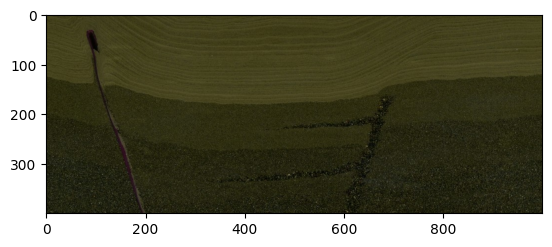

In [3]:
ROI_pix = da.extractROIPixel(baseline_image, (slice(400,800), slice(1000,2000)))
ROI_pix.plt_show()

If one would rather like to extract a ROI thought physical coordinates, in the coordinates 10 to 50 in the x-direction and 20 to 70 in the y-direction this is possible by the use of the command below:

In [ ]:
ROI_phys = da.extractROI(baseline_image, [10,50], [20, 70])
ROI_phys.plt_show()

A grid can be added to the image, where colors and thickness can be specified as user input.

In [ ]:
grid_image = baseline_image.add_grid(dx = 10, dy = 10, color= (150,0, 100))
grid_image.plt_show()

It is often very useful to consider images in single color spaces, especially when performing computationally demandng tasks. Below a grayscale image is first extracted from the baseline image, then a total variational denoising filter is applied.

In [ ]:
gray_baseline = baseline_image.toGray()
gray_baseline.plt_show()

In [ ]:
denoised_image = da.tv_denoising(gray_baseline, mu = 0.1, ell = 1, verbose = True)
denoised_image.plt_show()